# Simple EDA for The Scraped LinkedIn Jobs

In [50]:
import pandas as pd
import numpy as np

In [51]:
# read the data
data = pd.read_csv('linkedin_scraper.csv')
data

,Job Title,Company,Posted Date,Number of Applicants,Seniority Level,Job Function,Company Industry,Detail Desc,Employment Type
0,Data Engineer,PT. SURYA MADISTRINDO,5 hours ago,73 applicants,Entry level,Information Technology,Tobacco,At PT Surya Madistrindo (Subsidiary of PT Guda...,Full-time
1,Data Engineer,Danone,3 days ago,108 applicants,Not Applicable,Information Technology,Consumer Goods,About The Job\n\nData engineers are responsibl...,Full-time
2,Data Engineer,Tata Consultancy Services,1 week ago,52 applicants,Mid-Senior level,Information Technology,Information Technology and Services,Qualification:\nMin 3 years Experience in same...,Full-time
3,Data Engineer,Flash Coffee,2 days ago,Be among the first 25 applicants,Entry level,Information Technology,Food & Beverages,Do you love coffee & tech put together? Then y...,Full-time
4,Data Engineer,CIMB Niaga,1 week ago,123 applicants,Mid-Senior level,Information Technology,Banking,Job Description:\n\nPerform application system...,Full-time
...,...,...,...,...,...,...,...,...,...
629,Software Engineer,Happy5,6 days ago,41 applicants,Entry level,Engineering,Computer Software,We are looking for a Junior Backend Engineer (...,Full-time
630,Software Engineer Enterprise (Bot Builder),Kata.ai,4 days ago,Be among the first 25 applicants,Entry level,Engineering,Computer Software,Company Description\n\nKata.ai is an Indonesia...,Full-time
631,Software Engineer – Backend,GudangAda,2 weeks ago,71 applicants,Mid-Senior level,Engineering,Internet,Job Description\nOur Tech & Product team membe...,Full-time
632,Software Engineer (Location Platform),Traveloka,3 weeks ago,59 applicants,Mid-Senior level,Engineering,Internet,Company Description\nTraveloka is a technology...,Full-time


In [52]:
# create new feature `Recency Posted in Days` to see the recency days of posted jobs
# Note that this data was scraped on Thursday, 8th April 2021
data['Recency Posted in Days'] = np.where(
    data['Posted Date'].str.contains('day'), 
    1, np.where(
        data['Posted Date'].str.contains('week'), 
        7, np.where(
            data['Posted Date'].str.contains('month'), 30, 0 
        )
    )
)
data

,Job Title,Company,Posted Date,Number of Applicants,Seniority Level,Job Function,Company Industry,Detail Desc,Employment Type,Recency Posted in Days
0,Data Engineer,PT. SURYA MADISTRINDO,5 hours ago,73 applicants,Entry level,Information Technology,Tobacco,At PT Surya Madistrindo (Subsidiary of PT Guda...,Full-time,0
1,Data Engineer,Danone,3 days ago,108 applicants,Not Applicable,Information Technology,Consumer Goods,About The Job\n\nData engineers are responsibl...,Full-time,1
2,Data Engineer,Tata Consultancy Services,1 week ago,52 applicants,Mid-Senior level,Information Technology,Information Technology and Services,Qualification:\nMin 3 years Experience in same...,Full-time,7
3,Data Engineer,Flash Coffee,2 days ago,Be among the first 25 applicants,Entry level,Information Technology,Food & Beverages,Do you love coffee & tech put together? Then y...,Full-time,1
4,Data Engineer,CIMB Niaga,1 week ago,123 applicants,Mid-Senior level,Information Technology,Banking,Job Description:\n\nPerform application system...,Full-time,7
...,...,...,...,...,...,...,...,...,...,...
629,Software Engineer,Happy5,6 days ago,41 applicants,Entry level,Engineering,Computer Software,We are looking for a Junior Backend Engineer (...,Full-time,1
630,Software Engineer Enterprise (Bot Builder),Kata.ai,4 days ago,Be among the first 25 applicants,Entry level,Engineering,Computer Software,Company Description\n\nKata.ai is an Indonesia...,Full-time,1
631,Software Engineer – Backend,GudangAda,2 weeks ago,71 applicants,Mid-Senior level,Engineering,Internet,Job Description\nOur Tech & Product team membe...,Full-time,7
632,Software Engineer (Location Platform),Traveloka,3 weeks ago,59 applicants,Mid-Senior level,Engineering,Internet,Company Description\nTraveloka is a technology...,Full-time,7


In [53]:
# Extract only number from the `Posted Data` and `Number of Applicants`
def find_number(text):
    num = re.findall(r'[0-9]+', text)
    return " ".join(num)

In [54]:
# Extract from `Posted Date`
data['Posted Date in Numeric'] = data['Posted Date'].apply(lambda x: find_number(x))

In [55]:
# Extract from `Number of Applicants`
data['Number of Applicants in Numeric'] = data['Number of Applicants'].apply(lambda x: find_number(x))

In [56]:
data

,Job Title,Company,Posted Date,Number of Applicants,Seniority Level,Job Function,Company Industry,Detail Desc,Employment Type,Recency Posted in Days,Posted Date in Numeric,Number of Applicants in Numeric
0,Data Engineer,PT. SURYA MADISTRINDO,5 hours ago,73 applicants,Entry level,Information Technology,Tobacco,At PT Surya Madistrindo (Subsidiary of PT Guda...,Full-time,0,5,73
1,Data Engineer,Danone,3 days ago,108 applicants,Not Applicable,Information Technology,Consumer Goods,About The Job\n\nData engineers are responsibl...,Full-time,1,3,108
2,Data Engineer,Tata Consultancy Services,1 week ago,52 applicants,Mid-Senior level,Information Technology,Information Technology and Services,Qualification:\nMin 3 years Experience in same...,Full-time,7,1,52
3,Data Engineer,Flash Coffee,2 days ago,Be among the first 25 applicants,Entry level,Information Technology,Food & Beverages,Do you love coffee & tech put together? Then y...,Full-time,1,2,25
4,Data Engineer,CIMB Niaga,1 week ago,123 applicants,Mid-Senior level,Information Technology,Banking,Job Description:\n\nPerform application system...,Full-time,7,1,123
...,...,...,...,...,...,...,...,...,...,...,...,...
629,Software Engineer,Happy5,6 days ago,41 applicants,Entry level,Engineering,Computer Software,We are looking for a Junior Backend Engineer (...,Full-time,1,6,41
630,Software Engineer Enterprise (Bot Builder),Kata.ai,4 days ago,Be among the first 25 applicants,Entry level,Engineering,Computer Software,Company Description\n\nKata.ai is an Indonesia...,Full-time,1,4,25
631,Software Engineer – Backend,GudangAda,2 weeks ago,71 applicants,Mid-Senior level,Engineering,Internet,Job Description\nOur Tech & Product team membe...,Full-time,7,2,71
632,Software Engineer (Location Platform),Traveloka,3 weeks ago,59 applicants,Mid-Senior level,Engineering,Internet,Company Description\nTraveloka is a technology...,Full-time,7,3,59


In [157]:
# dclean as the copied dataframe
dclean = data.copy()
dclean

,Job Title,Company,Posted Date,Number of Applicants,Seniority Level,Job Function,Company Industry,Detail Desc,Employment Type,Recency Posted in Days,Posted Date in Numeric,Number of Applicants in Numeric
0,Data Engineer,PT. SURYA MADISTRINDO,5 hours ago,73 applicants,Entry level,Information Technology,Tobacco,At PT Surya Madistrindo (Subsidiary of PT Guda...,Full-time,0,5,73
1,Data Engineer,Danone,3 days ago,108 applicants,Not Applicable,Information Technology,Consumer Goods,About The Job\n\nData engineers are responsibl...,Full-time,1,3,108
2,Data Engineer,Tata Consultancy Services,1 week ago,52 applicants,Mid-Senior level,Information Technology,Information Technology and Services,Qualification:\nMin 3 years Experience in same...,Full-time,7,1,52
3,Data Engineer,Flash Coffee,2 days ago,Be among the first 25 applicants,Entry level,Information Technology,Food & Beverages,Do you love coffee & tech put together? Then y...,Full-time,1,2,25
4,Data Engineer,CIMB Niaga,1 week ago,123 applicants,Mid-Senior level,Information Technology,Banking,Job Description:\n\nPerform application system...,Full-time,7,1,123
...,...,...,...,...,...,...,...,...,...,...,...,...
629,Software Engineer,Happy5,6 days ago,41 applicants,Entry level,Engineering,Computer Software,We are looking for a Junior Backend Engineer (...,Full-time,1,6,41
630,Software Engineer Enterprise (Bot Builder),Kata.ai,4 days ago,Be among the first 25 applicants,Entry level,Engineering,Computer Software,Company Description\n\nKata.ai is an Indonesia...,Full-time,1,4,25
631,Software Engineer – Backend,GudangAda,2 weeks ago,71 applicants,Mid-Senior level,Engineering,Internet,Job Description\nOur Tech & Product team membe...,Full-time,7,2,71
632,Software Engineer (Location Platform),Traveloka,3 weeks ago,59 applicants,Mid-Senior level,Engineering,Internet,Company Description\nTraveloka is a technology...,Full-time,7,3,59


In [158]:
dclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Job Title                        634 non-null    object
 1   Company                          634 non-null    object
 2   Posted Date                      634 non-null    object
 3   Number of Applicants             634 non-null    object
 4   Seniority Level                  634 non-null    object
 5   Job Function                     634 non-null    object
 6   Company Industry                 634 non-null    object
 7   Detail Desc                      634 non-null    object
 8   Employment Type                  634 non-null    object
 9   Recency Posted in Days           634 non-null    int32 
 10  Posted Date in Numeric           634 non-null    object
 11  Number of Applicants in Numeric  634 non-null    object
dtypes: int32(1), object(11)
memory usage

In [159]:
# Convert the Object column # 1. Posted Date in Numeric
# 1. Posted Date in Numeric
# 2. Number of Applicants in Numeric df[["a", "b"]] = df[["a", "b"]].apply(pd.to_numeric)

dclean[['Posted Date in Numeric', 'Number of Applicants in Numeric']] = dclean[['Posted Date in Numeric', 'Number of Applicants in Numeric']].apply(pd.to_numeric, errors='coerce', downcast='integer')

In [160]:
dclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Job Title                        634 non-null    object
 1   Company                          634 non-null    object
 2   Posted Date                      634 non-null    object
 3   Number of Applicants             634 non-null    object
 4   Seniority Level                  634 non-null    object
 5   Job Function                     634 non-null    object
 6   Company Industry                 634 non-null    object
 7   Detail Desc                      634 non-null    object
 8   Employment Type                  634 non-null    object
 9   Recency Posted in Days           634 non-null    int32 
 10  Posted Date in Numeric           634 non-null    int8  
 11  Number of Applicants in Numeric  634 non-null    int16 
dtypes: int16(1), int32(1), int8(1), obje

In [161]:
# 0 mean the jobs just posted in the same day when the scraping done
dclean['Posted Date (in days ago)'] = dclean['Recency Posted in Days'] * dclean['Posted Date in Numeric']

In [162]:
# Drop the older columns as we don't need for the next step
dclean = dclean.drop(columns = ['Posted Date', 'Number of Applicants', 
                                'Recency Posted in Days', 'Posted Date in Numeric'])

In [163]:
dclean

,Job Title,Company,Seniority Level,Job Function,Company Industry,Detail Desc,Employment Type,Number of Applicants in Numeric,Posted Date (in days ago)
0,Data Engineer,PT. SURYA MADISTRINDO,Entry level,Information Technology,Tobacco,At PT Surya Madistrindo (Subsidiary of PT Guda...,Full-time,73,0
1,Data Engineer,Danone,Not Applicable,Information Technology,Consumer Goods,About The Job\n\nData engineers are responsibl...,Full-time,108,3
2,Data Engineer,Tata Consultancy Services,Mid-Senior level,Information Technology,Information Technology and Services,Qualification:\nMin 3 years Experience in same...,Full-time,52,7
3,Data Engineer,Flash Coffee,Entry level,Information Technology,Food & Beverages,Do you love coffee & tech put together? Then y...,Full-time,25,2
4,Data Engineer,CIMB Niaga,Mid-Senior level,Information Technology,Banking,Job Description:\n\nPerform application system...,Full-time,123,7
...,...,...,...,...,...,...,...,...,...
629,Software Engineer,Happy5,Entry level,Engineering,Computer Software,We are looking for a Junior Backend Engineer (...,Full-time,41,6
630,Software Engineer Enterprise (Bot Builder),Kata.ai,Entry level,Engineering,Computer Software,Company Description\n\nKata.ai is an Indonesia...,Full-time,25,4
631,Software Engineer – Backend,GudangAda,Mid-Senior level,Engineering,Internet,Job Description\nOur Tech & Product team membe...,Full-time,71,14
632,Software Engineer (Location Platform),Traveloka,Mid-Senior level,Engineering,Internet,Company Description\nTraveloka is a technology...,Full-time,59,21


In [164]:
dclean = dclean.reset_index()

In [165]:
#dclean[['Posted Date (in days ago)']] = dclean[['Posted Date (in days ago)']].to_string

In [166]:
dclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   index                            634 non-null    int64 
 1   Job Title                        634 non-null    object
 2   Company                          634 non-null    object
 3   Seniority Level                  634 non-null    object
 4   Job Function                     634 non-null    object
 5   Company Industry                 634 non-null    object
 6   Detail Desc                      634 non-null    object
 7   Employment Type                  634 non-null    object
 8   Number of Applicants in Numeric  634 non-null    int16 
 9   Posted Date (in days ago)        634 non-null    int32 
dtypes: int16(1), int32(1), int64(1), object(7)
memory usage: 43.5+ KB


In [167]:
dclean

,index,Job Title,Company,Seniority Level,Job Function,Company Industry,Detail Desc,Employment Type,Number of Applicants in Numeric,Posted Date (in days ago)
0,0,Data Engineer,PT. SURYA MADISTRINDO,Entry level,Information Technology,Tobacco,At PT Surya Madistrindo (Subsidiary of PT Guda...,Full-time,73,0
1,1,Data Engineer,Danone,Not Applicable,Information Technology,Consumer Goods,About The Job\n\nData engineers are responsibl...,Full-time,108,3
2,2,Data Engineer,Tata Consultancy Services,Mid-Senior level,Information Technology,Information Technology and Services,Qualification:\nMin 3 years Experience in same...,Full-time,52,7
3,3,Data Engineer,Flash Coffee,Entry level,Information Technology,Food & Beverages,Do you love coffee & tech put together? Then y...,Full-time,25,2
4,4,Data Engineer,CIMB Niaga,Mid-Senior level,Information Technology,Banking,Job Description:\n\nPerform application system...,Full-time,123,7
...,...,...,...,...,...,...,...,...,...,...
629,629,Software Engineer,Happy5,Entry level,Engineering,Computer Software,We are looking for a Junior Backend Engineer (...,Full-time,41,6
630,630,Software Engineer Enterprise (Bot Builder),Kata.ai,Entry level,Engineering,Computer Software,Company Description\n\nKata.ai is an Indonesia...,Full-time,25,4
631,631,Software Engineer – Backend,GudangAda,Mid-Senior level,Engineering,Internet,Job Description\nOur Tech & Product team membe...,Full-time,71,14
632,632,Software Engineer (Location Platform),Traveloka,Mid-Senior level,Engineering,Internet,Company Description\nTraveloka is a technology...,Full-time,59,21


In [168]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
from IPython.display import Image
from plotly.subplots import make_subplots

sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.19.2
pandas version :  1.2.1
seaborn version :  0.11.1


In [169]:
# check the cardinality or unique value from categorical data 
# and assign thgem into data_cat_unique object
display(dclean.select_dtypes(include=['object']).columns)
print(dclean.select_dtypes(include=object).shape)
data_cat = dclean.select_dtypes(include=['object'])
data_cat.head(3)

Index(['Job Title', 'Company', 'Seniority Level', 'Job Function',
       'Company Industry', 'Detail Desc', 'Employment Type'],
      dtype='object')

(634, 7)


,Job Title,Company,Seniority Level,Job Function,Company Industry,Detail Desc,Employment Type
0,Data Engineer,PT. SURYA MADISTRINDO,Entry level,Information Technology,Tobacco,At PT Surya Madistrindo (Subsidiary of PT Guda...,Full-time
1,Data Engineer,Danone,Not Applicable,Information Technology,Consumer Goods,About The Job\n\nData engineers are responsibl...,Full-time
2,Data Engineer,Tata Consultancy Services,Mid-Senior level,Information Technology,Information Technology and Services,Qualification:\nMin 3 years Experience in same...,Full-time


In [170]:
data_cat_unique = data_cat.nunique().reset_index()
data_cat_unique.columns = ['feature', 'unique value']
data_cat_unique = data_cat_unique.sort_values('unique value', ascending=False).reset_index(drop=True)
data_cat_unique

,feature,unique value
0,Detail Desc,561
1,Job Title,322
2,Company,305
3,Company Industry,41
4,Job Function,16
5,Seniority Level,8
6,Employment Type,5


In [171]:
dclean.duplicated().sum()

0

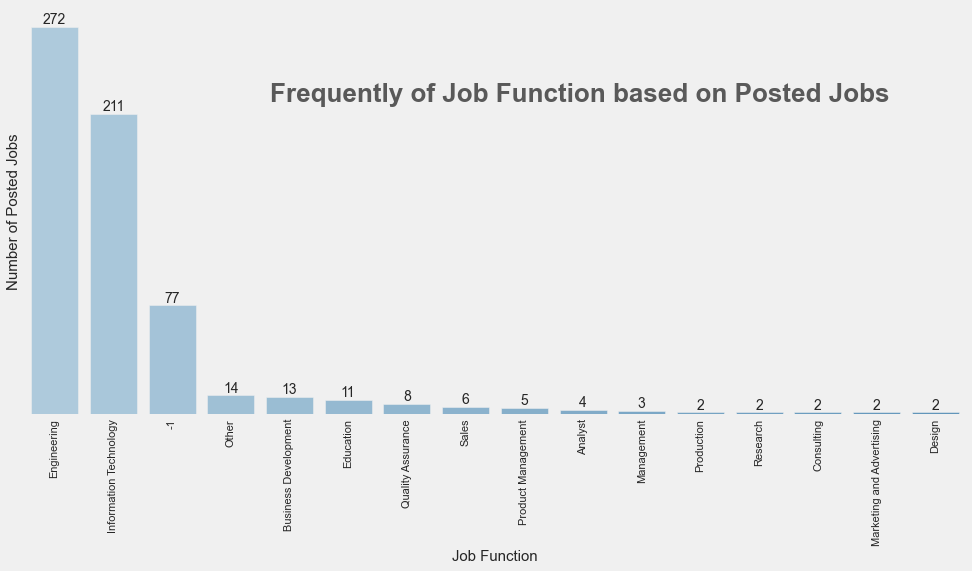

In [201]:
fig, ax = plt.subplots(figsize = (15,7))

g = sns.countplot(data=dclean,
                  x='Job Function',
                  order = dclean['Job Function'].value_counts().index,
                  palette = sns.color_palette('Blues_d', n_colors = 41, desat = 1))


for p in g.patches:
    height = p.get_height()
    plt.text(x = p.get_x() + (p.get_width()/2),
           y = height + 2,
           s = '{:.0f}'.format(height),
           ha = 'center'
          )

title = """
Frequently of Job Function based on Posted Jobs 
"""

plt.yticks([]) # Hide the y-axis with empty list
plt.xlabel('Job Function', fontsize = 15) # Add the x-label
plt.ylabel('Number of Posted Jobs', fontsize = 15) # Add the y-label
plt.xticks(rotation=90)
plt.text(x =9, y = 200, s=title,
        fontsize = 26, weight = 'bold', alpha = .75, ha='center')

plt.savefig('fig/Job Function.png')

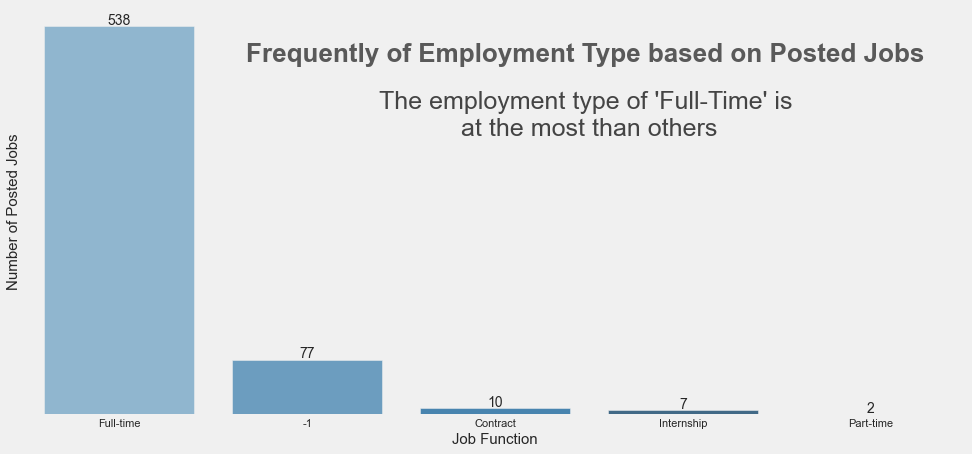

In [173]:
fig, ax = plt.subplots(figsize = (15,7))

g = sns.countplot(data=dclean,
                  x='Employment Type',
                  order = dclean['Employment Type'].value_counts().index,
                  palette = sns.color_palette('Blues_d', n_colors = 5, desat = 1))


for p in g.patches:
    height = p.get_height()
    plt.text(x = p.get_x() + (p.get_width()/2),
           y = height + 2,
           s = '{:.0f}'.format(height),
           ha = 'center'
          )

title = """
Frequently of Employment Type based on Posted Jobs 
"""

text = """
The employment type of 'Full-Time' is 
at the most than others
"""

plt.yticks([]) # Hide the y-axis with empty list
plt.xlabel('Job Function', fontsize = 15) # Add the x-label
plt.ylabel('Number of Posted Jobs', fontsize = 15) # Add the y-label
#plt.xticks(rotation=90)
plt.text(x = 2.5, y = 450, s=title,
        fontsize = 26, weight = 'bold', alpha = .75, ha = 'center')
plt.text(x = 2.5, y = 350, s=text,
        fontsize = 25, alpha = .85, ha = 'center');

plt.savefig('fig/Employment Type.png')

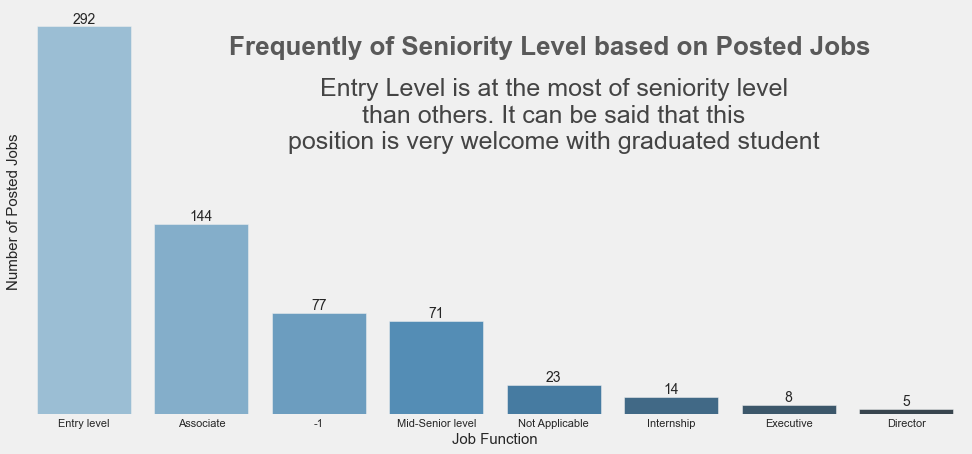

In [174]:
fig, ax = plt.subplots(figsize = (15,7))

g = sns.countplot(data=dclean,
                  x='Seniority Level',
                  order = dclean['Seniority Level'].value_counts().index,
                  palette = sns.color_palette('Blues_d', n_colors = 8, desat = 1))


for p in g.patches:
    height = p.get_height()
    plt.text(x = p.get_x() + (p.get_width()/2),
           y = height + 2,
           s = '{:.0f}'.format(height),
           ha = 'center'
          )

title = """
Frequently of Seniority Level based on Posted Jobs 
"""

text = """
Entry Level is at the most of seniority level
than others. It can be said that this
position is very welcome with graduated student
"""

plt.yticks([]) # Hide the y-axis with empty list
plt.xlabel('Job Function', fontsize = 15) # Add the x-label
plt.ylabel('Number of Posted Jobs', fontsize = 15) # Add the y-label
#plt.xticks(rotation=90)
plt.text(x = 4, y = 250, s=title,
        fontsize = 26, weight = 'bold', alpha = .75, ha = 'center')
plt.text(x = 4, y = 180, s=text,
        fontsize = 25, alpha = .85, ha = 'center');

plt.savefig('fig/Seniority Level.png')

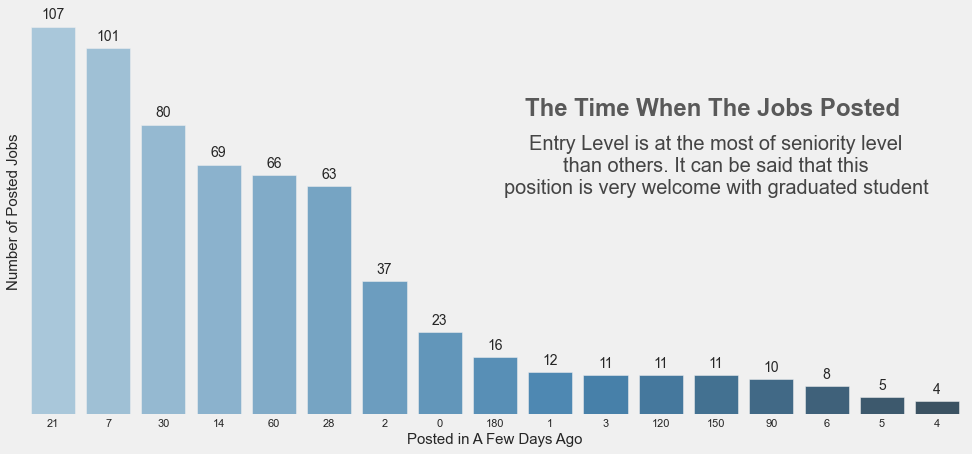

In [186]:
fig, ax = plt.subplots(figsize = (15,7))

g = sns.countplot(data=dclean,
                  x='Posted Date (in days ago)',
                  order = dclean['Posted Date (in days ago)'].value_counts().index,
                  palette = sns.color_palette('Blues_d', n_colors = 20, desat = 1))


for p in g.patches:
    height = p.get_height()
    plt.text(x = p.get_x() + (p.get_width()/2),
           y = height + 2,
           s = '{:.0f}'.format(height),
           ha = 'center'
          )

title = """
The Time When The Jobs Posted 
"""

text = """
Entry Level is at the most of seniority level
than others. It can be said that this
position is very welcome with graduated student
"""

plt.yticks([]) # Hide the y-axis with empty list
plt.xlabel('Posted in A Few Days Ago', fontsize = 15) # Add the x-label
plt.ylabel('Number of Posted Jobs', fontsize = 15) # Add the y-label
#plt.xticks(rotation=90)
plt.text(x = 12, y = 75, s=title,
        fontsize = 24, weight = 'bold', alpha = .75, ha = 'center')
plt.text(x = 12, y = 55, s=text,
        fontsize = 20, alpha = .85, ha = 'center');

plt.savefig('fig/The Time When The Jobs Posted.png')

In [189]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

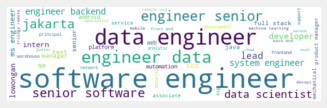

In [198]:
words = " ".join(dclean['Job Title'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 50, width =500, height = 150)
wc.generate(text)

plt.figure(figsize=[5,5])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

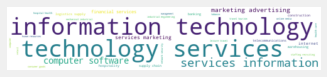

In [194]:
words = " ".join(dclean['Company Industry'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 50, width =500, height = 100)
wc.generate(text)

plt.figure(figsize=[5,5])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()